# MNIST

In [10]:
import numpy as np
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


ConnectionResetError: [Errno 54] Connection reset by peer

In [2]:
X=mnist.data
X.shape

NameError: name 'mnist' is not defined

# 使用PCA降噪

In [3]:
from sklearn import datasets
import numpy as np
digits=datasets.load_digits()
X=digits.data
y=digits.target


In [4]:
noisy_digits=X+np.random.normal(0,4,size=X.shape)

In [5]:
example_digits=noisy_digits[y==0,:][:10]

In [6]:
for num in range(1,10):
    X_num=noisy_digits[y==num,:][:10]
    example_digits=np.vstack([example_digits,X_num])

In [14]:
example_digits.shape

(100, 64)

In [15]:
from sklearn.decomposition import PCA

In [11]:
def plot_digits(data):
    fig,axes=plt.subplots(10,10,figsize=(10,10),subplot_kw={'xticks':[],'yticks':[]},
                         gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                 cmap='binary',interpolation='nearest',clim=(0,16))

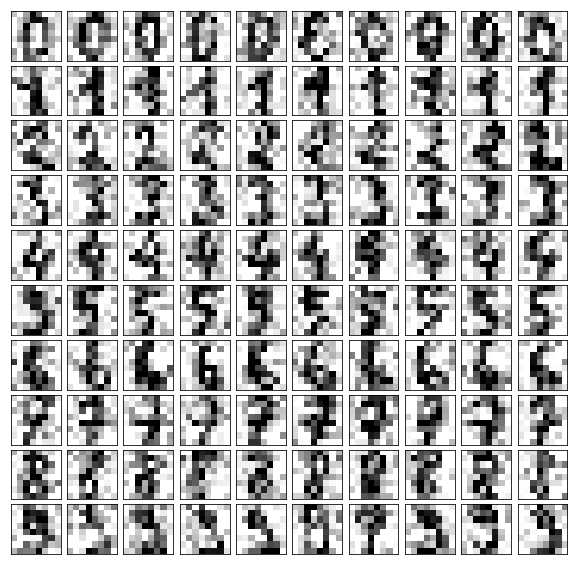

In [12]:
plot_digits(example_digits)

In [16]:
pca=PCA(0.5)

In [17]:
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
pca.n_components_

12

In [20]:
components=pca.transform(example_digits)

In [22]:
filtered_digits=pca.inverse_transform(components)

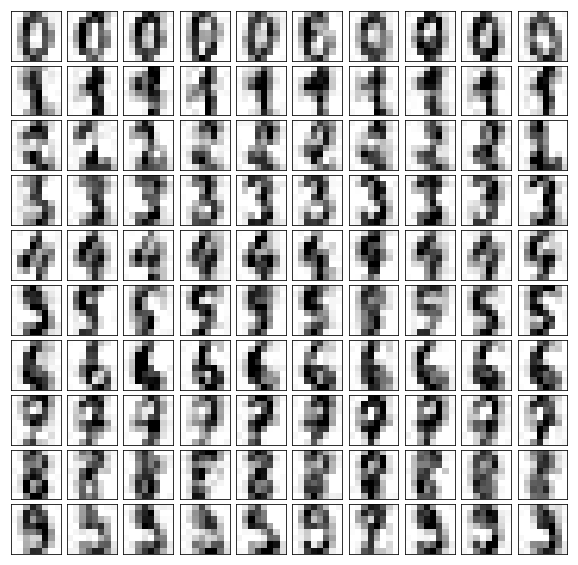

In [23]:
plot_digits(filtered_digits)